#  Analyzing and Visualizing Air Pollution Trends: Insights from India AQI Data

This project analyzes air quality data from across India to identify pollution trends, hotspots, and patterns. We'll explore various pollutants like PM2.5, PM10, NO2, CO, and O3 across different cities and states.

#**Data source :**Real time Air Quality Index from various locations at https://www.data.gov.in/

## **1 Data Loading and Initial Exploration**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

# Load the dataset
df = pd.read_csv('AirQualityData.csv')

# Display basic info
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3228 non-null   object 
 1   state          3228 non-null   object 
 2   city           3228 non-null   object 
 3   station        3228 non-null   object 
 4   last_update    3228 non-null   object 
 5   latitude       3228 non-null   float64
 6   longitude      3228 non-null   float64
 7   pollutant_id   3228 non-null   object 
 8   pollutant_min  2940 non-null   float64
 9   pollutant_max  2940 non-null   float64
 10  pollutant_avg  2940 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.5+ KB


In [34]:
# Display first few rows
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",07-04-2025 18:00:00,17.720000,83.300000,OZONE,NaN,NaN,NaN
1,India,Assam,Guwahati,"IITG, Guwahati - PCBA",07-04-2025 18:00:00,26.202864,91.700464,PM2.5,59.0,121.0,88.0
2,India,Assam,Guwahati,"IITG, Guwahati - PCBA",07-04-2025 18:00:00,26.202864,91.700464,PM10,88.0,203.0,115.0
3,India,Assam,Guwahati,"IITG, Guwahati - PCBA",07-04-2025 18:00:00,26.202864,91.700464,NO2,1.0,3.0,1.0
4,India,Assam,Guwahati,"IITG, Guwahati - PCBA",07-04-2025 18:00:00,26.202864,91.700464,CO,11.0,16.0,12.0


## **2️ Data Cleaning and Preprocessing**

In [35]:
# Convert last_update to datetime
df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S')

# Handle missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())




Missing values before cleaning:
country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    288
pollutant_max    288
pollutant_avg    288
dtype: int64


In [36]:
# For numeric columns, fill NA with median of that pollutant in that city
numeric_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
for col in numeric_cols:
    df[col] = df.groupby(['city', 'pollutant_id'])[col].transform(lambda x: x.fillna(x.median()))

# For remaining NAs, fill with overall median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


## **3 Exploratory Data Analysis (EDA)**

In [37]:
# Summary statistics for pollutants
print("\nSummary statistics for pollutants:")
display(df.groupby('pollutant_id')['pollutant_avg'].describe())




Summary statistics for pollutants:


,count,mean,std,min,25%,50%,75%,max
pollutant_id,,,,,,,,
CO,467.0,31.428266,18.149141,2.0,18.0,28.0,40.00,117.0
NH3,421.0,7.526128,7.765033,1.0,3.0,5.0,8.00,36.0
NO2,473.0,35.257928,29.788148,1.0,14.0,27.0,46.00,208.0
OZONE,454.0,63.033040,56.938563,1.0,26.0,50.0,77.75,316.0
PM10,476.0,104.353992,62.115022,3.0,60.0,93.0,127.25,342.0
PM2.5,480.0,86.146875,62.546374,2.0,43.0,64.5,105.25,358.0
SO2,457.0,18.425602,14.977210,1.0,8.0,14.0,25.00,109.0


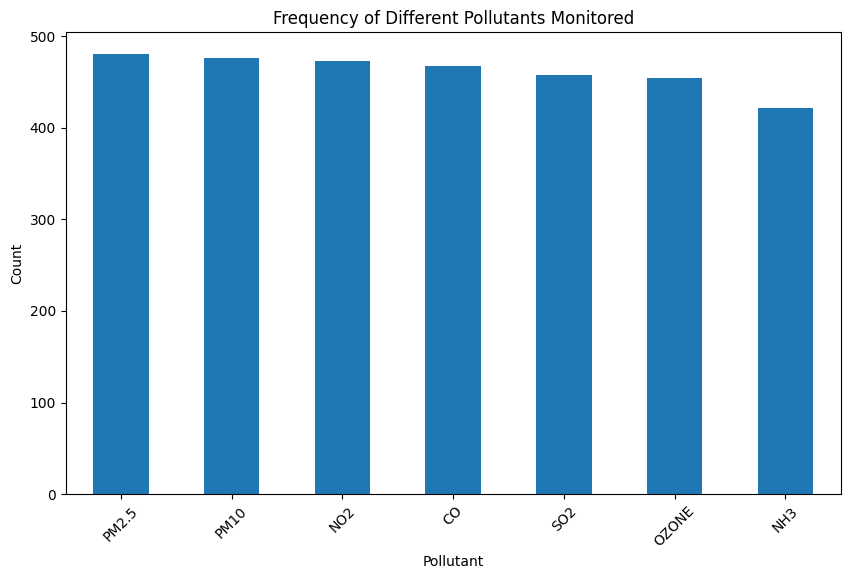

In [38]:
# Top 10 most monitored pollutants
plt.figure(figsize=(10, 6))
df['pollutant_id'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Pollutants Monitored')
plt.xlabel('Pollutant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **3.1 Pivot Tables for Advanced Analysis**

In [39]:
# pivot table for average pollution by state and pollutant
pivot_state_pollutant = pd.pivot_table(df,
                                      values='pollutant_avg',
                                      index='state',
                                      columns='pollutant_id',
                                      aggfunc='mean')

print("\nAverage Pollution Levels by State and Pollutant:")
display(pivot_state_pollutant)




Average Pollution Levels by State and Pollutant:


pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
state,,,,,,,
Andaman and Nicobar,14.000000,1.000000,23.000000,16.000000,12.000000,5.000000,14.000000
Andhra_Pradesh,28.250000,7.000000,24.916667,33.166667,52.583333,56.666667,13.000000
Assam,32.000000,7.857143,14.250000,27.444444,93.333333,108.000000,17.500000
Bihar,42.088235,8.322581,19.779412,37.264706,100.677419,98.000000,18.454545
Chandigarh,39.333333,16.666667,72.666667,122.000000,105.666667,94.666667,13.000000
Chhattisgarh,30.142857,4.000000,47.500000,31.833333,94.000000,74.714286,14.000000
Delhi,40.684211,11.612903,84.512821,149.702703,241.205128,213.012821,27.437500
Gujarat,25.428571,6.269231,33.312500,43.733333,79.533333,74.875000,24.562500
Haryana,23.500000,7.000000,45.500000,224.500000,76.500000,101.500000,22.000000


In [40]:
# Pivot table for top polluted cities for each pollutant
pivot_city_pollutant = pd.pivot_table(df,
                                     values='pollutant_avg',
                                     index='city',
                                     columns='pollutant_id',
                                     aggfunc='mean')

print("\nTop 5 Cities for PM2.5:")
display(pivot_city_pollutant['PM2.5'].sort_values(ascending=False).head(5))

print("\nTop 5 Cities for PM10:")
display(pivot_city_pollutant['PM10'].sort_values(ascending=False).head(5))


Top 5 Cities for PM2.5:


,PM2.5
city,
Sasaram,235.000000
Noida,226.500000
Ghaziabad,222.000000
Greater Noida,214.000000
Delhi,213.012821



Top 5 Cities for PM10:


,PM10
city,
Noida,263.500000
Delhi,241.205128
Sawai Madhopur,236.000000
Ghaziabad,213.000000
Baghpat,206.000000


## **3.2 Geospatial Visualization**

In [41]:
# A map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Prepare data for heatmap (using PM2.5 )
pm25_data = df[df['pollutant_id'] == 'PM2.5']
heat_data = [[row['latitude'], row['longitude'], row['pollutant_avg']]
            for _, row in pm25_data.iterrows()]

HeatMap(heat_data, radius=15).add_to(india_map)

# Display the map
india_map

## **3.3 Correlation Analysis**

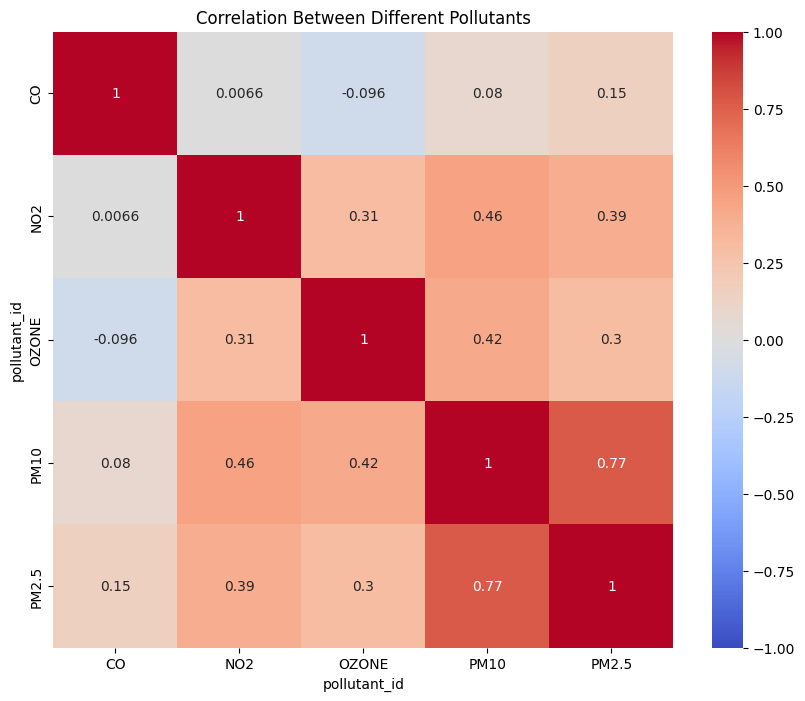

In [42]:
# A correlation matrix for different pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'OZONE']
corr_df = df[df['pollutant_id'].isin(pollutants)]
corr_pivot = pd.pivot_table(corr_df, values='pollutant_avg', index=['city', 'last_update'], columns='pollutant_id')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pivot.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Different Pollutants')
plt.show()

## **3.4 Advanced Visualizations with Plotly**

In [43]:
# Interactive bubble chart of cities by pollution levels
city_pollution = df.groupby(['city', 'state', 'latitude', 'longitude'])['pollutant_avg'].mean().reset_index()

fig = px.scatter_geo(city_pollution,
                    lat='latitude',
                    lon='longitude',
                    size='pollutant_avg',
                    color='pollutant_avg',
                    hover_name='city',
                    hover_data=['state'],
                    scope='asia',
                    title='Air Pollution Levels Across Indian Cities',
                    color_continuous_scale='reds')

fig.update_geos(
    center=dict(lon=78.9629, lat=20.5937),
    projection_scale=5
)

fig.show()

## **3.5 State-wise Pollution Comparison**

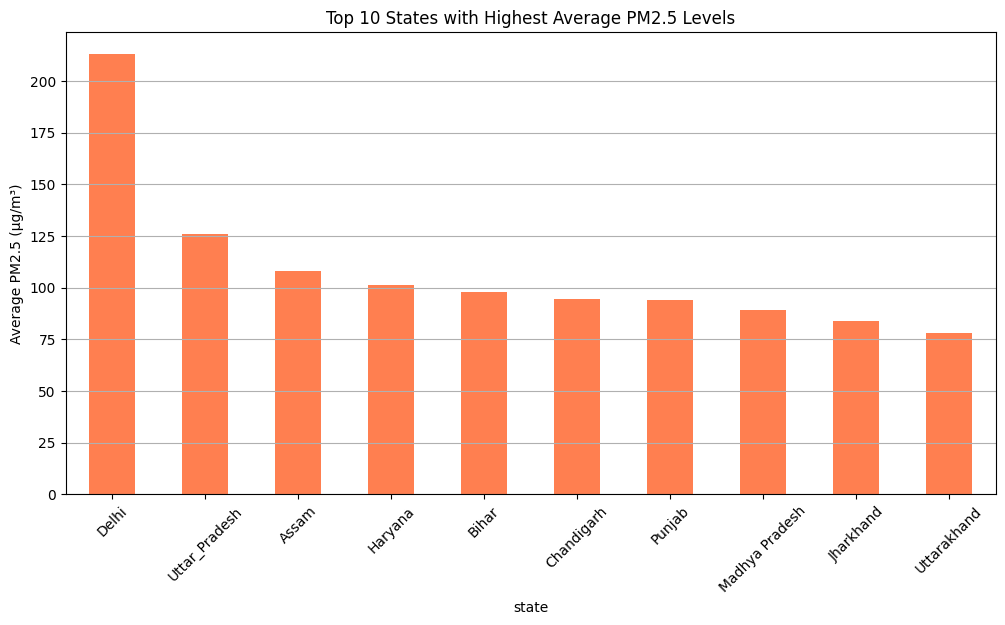

In [44]:
# Top 10 states with highest average PM2.5
top_states_pm25 = df[df['pollutant_id'] == 'PM2.5'].groupby('state')['pollutant_avg']\
    .mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_states_pm25.plot(kind='bar', color='coral')
plt.title('Top 10 States with Highest Average PM2.5 Levels')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#**3.6 Station-wise pollution comparision (top 10)**

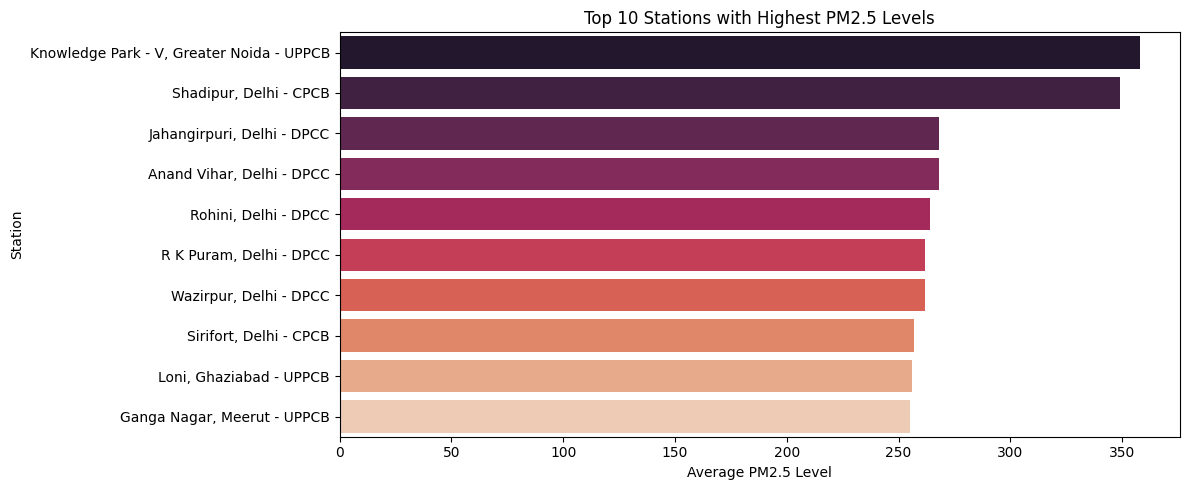

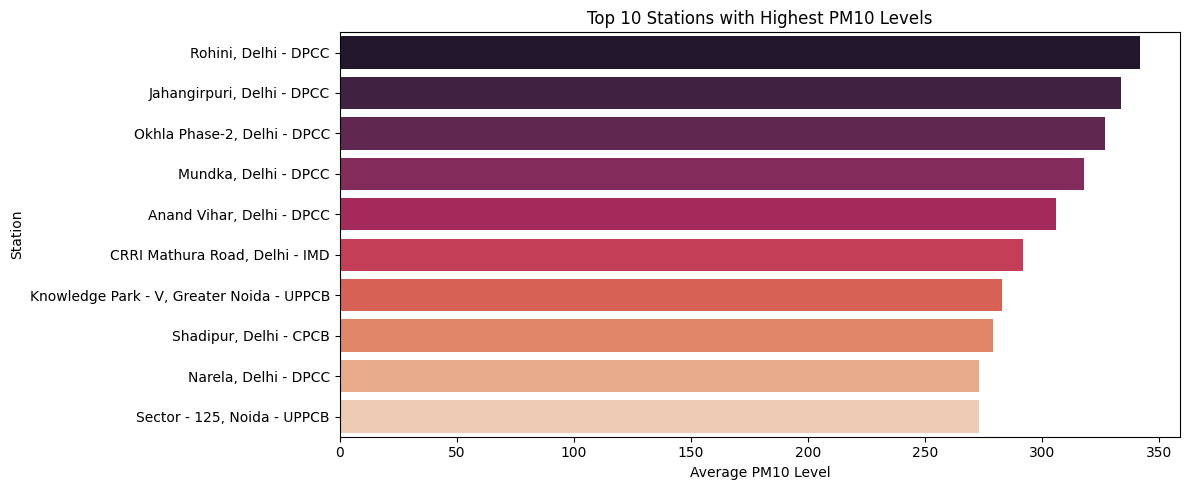

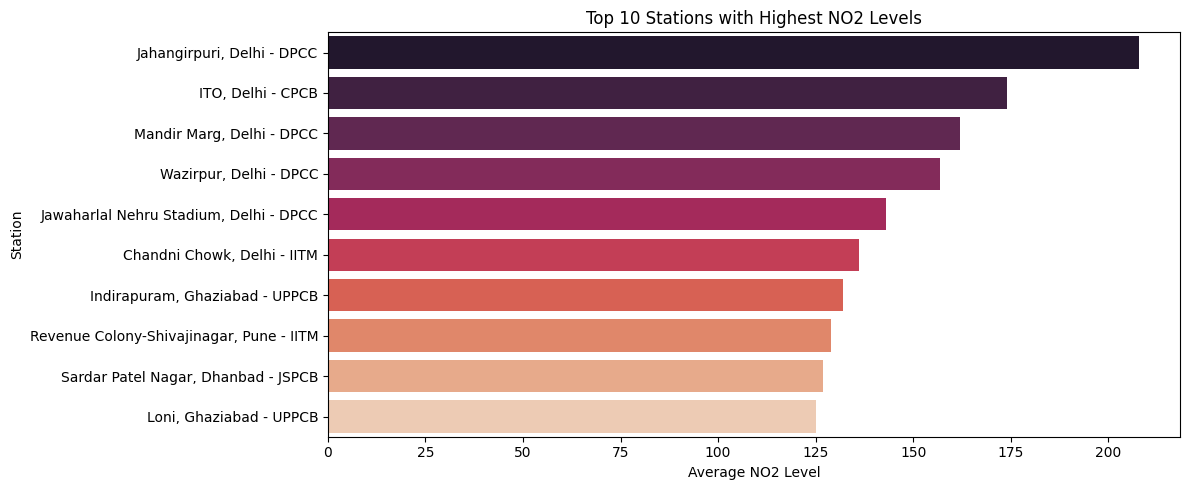

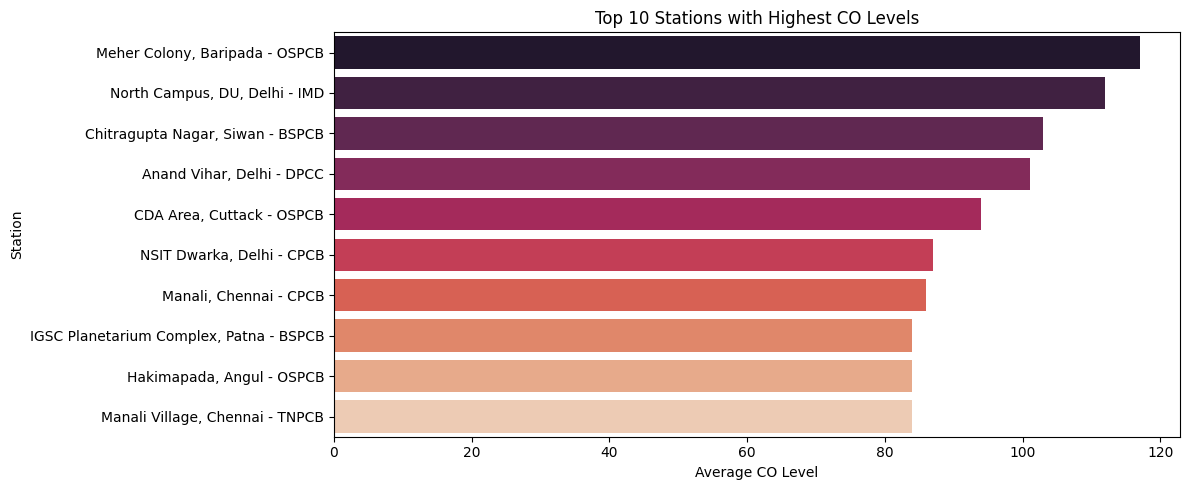

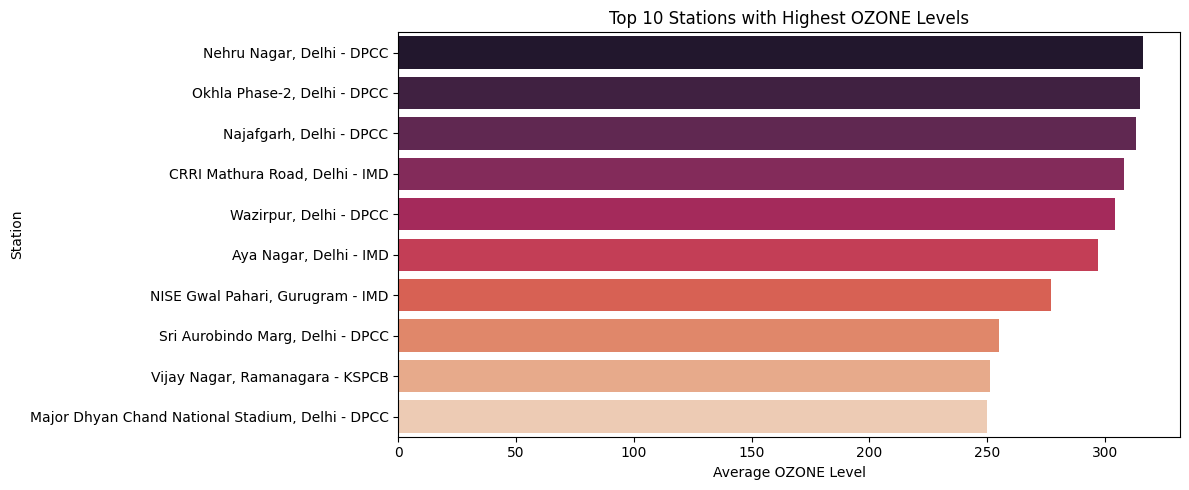

In [45]:
# Get average pollutant per station
station_pollutants = df.pivot_table(index='station', columns='pollutant_id', values='pollutant_avg', aggfunc='mean')

# Plot top stations for key pollutants
important_pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'OZONE']

for pollutant in important_pollutants:
    if pollutant in station_pollutants.columns:
        top_stations = station_pollutants[pollutant].sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 5))
        sns.barplot(x=top_stations.values, y=top_stations.index,hue=top_stations.index, palette='rocket', legend=False)
        plt.title(f'Top 10 Stations with Highest {pollutant} Levels')
        plt.xlabel(f'Average {pollutant} Level')
        plt.ylabel('Station')
        plt.tight_layout()
        plt.show()


# **3.7 Polltion composition and Pollution levels Vs Latitude**

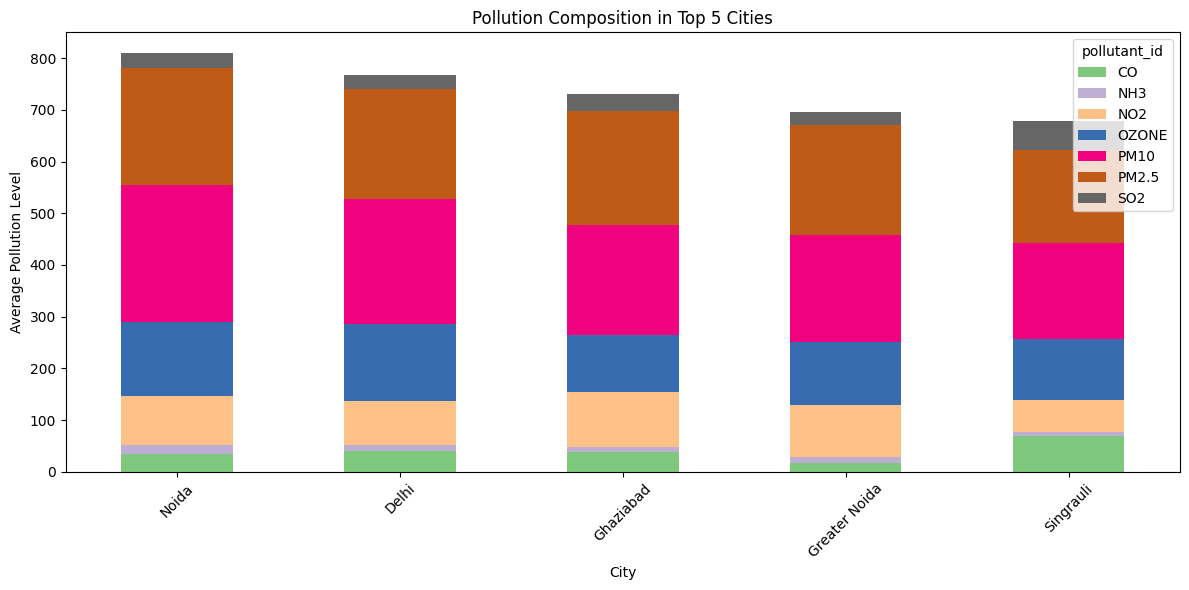

In [46]:
# Pivot to get pollutant types by city
city_pollutant_avg = df.pivot_table(index='city', columns='pollutant_id', values='pollutant_avg', aggfunc='mean').fillna(0)

# Top 5 cities by total pollution
top5_cities = city_pollutant_avg.sum(axis=1).sort_values(ascending=False).head(5).index

# Plot stacked bar
city_pollutant_avg.loc[top5_cities].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Pollution Composition in Top 5 Cities')
plt.ylabel('Average Pollution Level')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


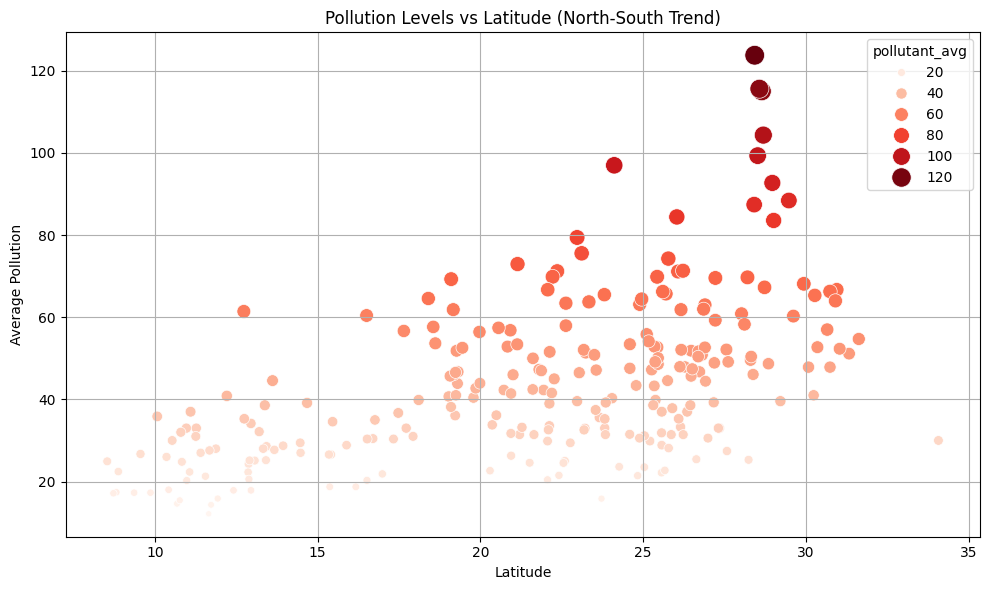

In [47]:
# Average pollution by city with latitude
lat_city_pollution = df.groupby('city')[['latitude', 'pollutant_avg']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lat_city_pollution, x='latitude', y='pollutant_avg', hue='pollutant_avg',
                palette='Reds', size='pollutant_avg', sizes=(20, 200))
plt.title('Pollution Levels vs Latitude (North-South Trend)')
plt.xlabel('Latitude')
plt.ylabel('Average Pollution')
plt.grid(True)
plt.tight_layout()
plt.show()


#**3.8 Pollutant Heatmap by State**

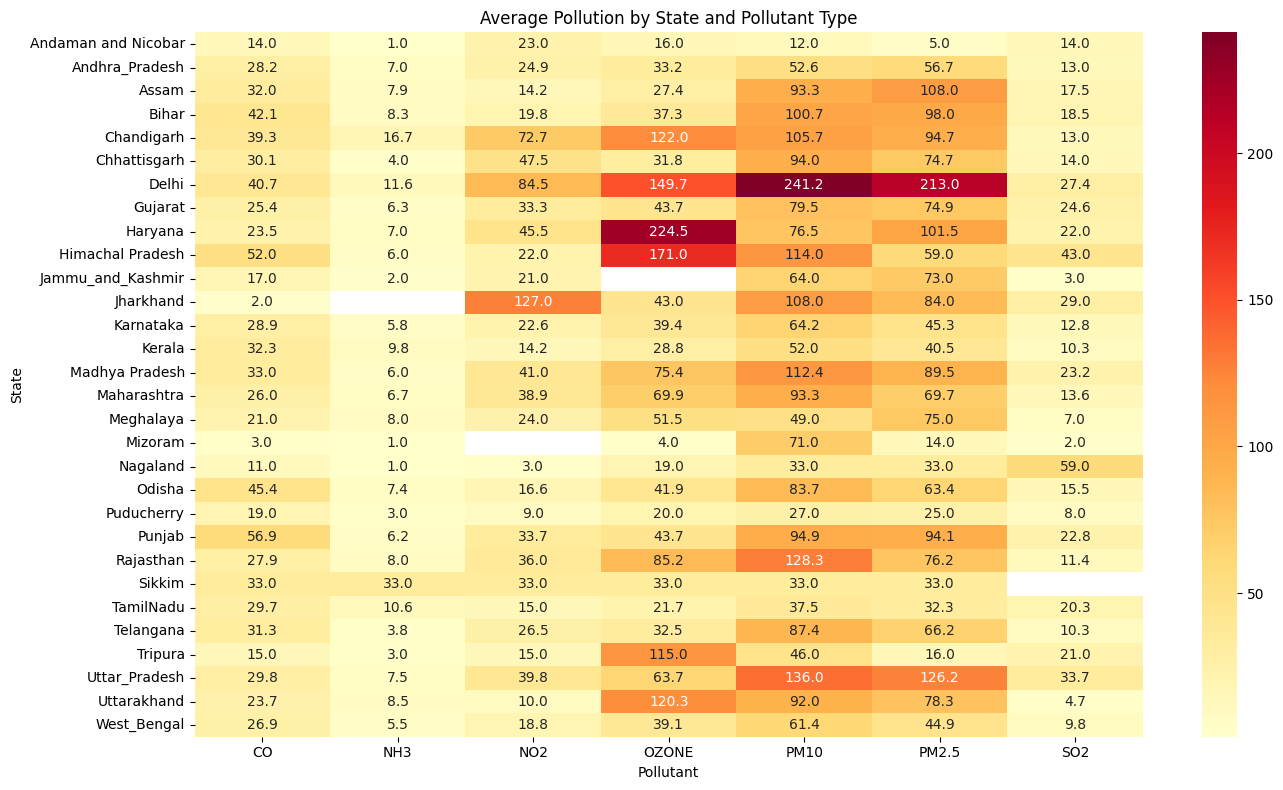

In [48]:
# Pivot: average pollution by state and pollutant
pivot_state_pollutant = df.pivot_table(index='state', columns='pollutant_id', values='pollutant_avg', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_state_pollutant, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Average Pollution by State and Pollutant Type')
plt.xlabel('Pollutant')
plt.ylabel('State')
plt.tight_layout()
plt.show()


## **4 Insights and Recommendations**

### Key Insights:
1. **Pollution Hotspots**: Cities like Delhi,Uttar pradesh,Assam,Haryana,Bihar, show consistently high levels of PM2.5 and PM10.
2. **Pollutant Correlations**: Strong correlation between PM2.5 and PM10 suggests common sources like vehicular emissions.
3. **Geographical Trends**: Northern states show higher pollution levels compared to southern states.
4. **Localized Pollutants**:Jharkhand has high NO2 level, Haryana and Himachal for Ozone and PM2.5,PM10 in delhi.

### Recommendations:
1. **Targeted Interventions**: Focus pollution control measures in identified hotspot cities.
2. **Time-based Regulations**: Implement traffic restrictions during peak pollution hours.
3. **Monitoring Expansion**: Increase monitoring stations in underrepresented regions.
4. **Public Awareness**: Develop real-time air quality alert systems for citizens.